## OMEGA-MAPPIN - Map Comparisons

This notebook runs through the analysis comparing different data types. 

Maps are all put into the same space - the 7500 vertices of the template brain. 
- Oscs, slopes, genes and terms are defined for each vertex.
- Anat is defined over ROIs

Data types availabe: electrophys (oscillations and slopes), genes, terms, and anatomical. 

In [11]:
# Import required libraries
import sys

# Import custom code from module om, and OO code for handling data
sys.path.append('/Users/thomasdonoghue/Documents/GitCode/omegamappin/')
from om.gen import *                    # Import general code 
from om.cl.mc_tg import *               # Import Map-Compare Classes for Terms/Genes Data
from om.plts.mc_plts import *           # Import Map-Compare Plots

# Set plots to display inline
%matplotlib inline

In [12]:
# Initialize MapComp object and oscillatory bands list
db = OMDB()
om_maps = MapCompTG(db)

In [13]:
# Check files that are available
db.check_map_files()

Oscillation Files:
 Group_Osc_Scores.npz
Group_Osc_Scores_OLD.npz
Res_Group_85_Osc_prob.p
Res_Group_85_Osc_score.p 

Slope Files:
 Group_Slopes.npz 

Terms Files:
 all_terms_r10_gaussian_estimation.csv
all_terms_r5_gaussian_estimation.csv
ns_terms.csv 

Genes Files:
 avg_gene_estimations
real_gene_names.csv
sub1_gene_estimations
sub2_gene_estimations
sub3_gene_estimations
sub4_gene_estimations
sub5_gene_estimations
sub6_gene_estimations 



In [14]:
# Load oscillation maps - here using the oscillation scores
om_maps.load_meg_maps('Res_Group_85_Osc_Score')

In [15]:
# Load slope map
om_maps.load_slope_map('Res_Group_85')

### FUNCTION ANALYSIS

Function data all stems from the NeuroSynth meta-analytic tool for fMRI data. 

NeuroSynth does textual analysis on fMRI papers, and weights cognitive terms to anatomical locations reported in the paper. Here, we estimate the loading for each term at each of our cortical locations. We can them compare which cognitive terms, relating to function, correlate with electrophysiological signals. 

In [16]:
# Load term maps - here using 10 mm spatial estimation
om_maps.load_term_maps('all_terms_r10_gaussian_estimation.csv')

In [22]:
# Calculate the correlation between all oscillation maps and terms
for osc in om_maps.bands:
    om_maps.calc_corrs('Terms', osc, method='parallel')

Calculating corrs between Terms and Theta
importing numpy on engine(s)
importing pearsonr from scipy.stats.stats on engine(s)
Calculating corrs between Terms and Beta
importing numpy on engine(s)
importing pearsonr from scipy.stats.stats on engine(s)
Calculating corrs between Terms and LowGamma
importing numpy on engine(s)
importing pearsonr from scipy.stats.stats on engine(s)
Calculating corrs between Terms and Alpha
importing numpy on engine(s)
importing pearsonr from scipy.stats.stats on engine(s)


In [23]:
# Print out highest correlated terms for each oscillation band
for osc in om_maps.bands:
    om_maps.check_corrs('Terms', osc)



Correlations for  Terms  &   Theta : 

# 	 Terms                          	 R-Vals 	 P-vals 

1 	 prefrontal                     	 0.45775 	 0.0000e+00
2 	 prefrontal cortex              	 0.45083 	 0.0000e+00
3 	 medial                         	 0.37308 	 2.2801e-246
4 	 medial prefrontal              	 0.36822 	 1.4919e-239
5 	 mpfc                           	 0.35550 	 2.7313e-222
6 	 dorsomedial                    	 0.35223 	 5.6029e-218
7 	 dorsomedial prefrontal         	 0.34109 	 1.1230e-203
8 	 cortex mpfc                    	 0.33921 	 2.5888e-201
9 	 ventromedial                   	 0.33702 	 1.3473e-198
10 	 voxel morphometry              	 0.33091 	 4.2091e-191
11 	 gray matter                    	 0.32660 	 6.2540e-186
12 	 negative                       	 0.32614 	 2.2345e-185
13 	 gray                           	 0.32307 	 9.4040e-182
14 	 morphometry                    	 0.32088 	 3.5264e-179
15 	 pfc                            	 0.31890 	 6.9106e-177
16 	 orbitofron

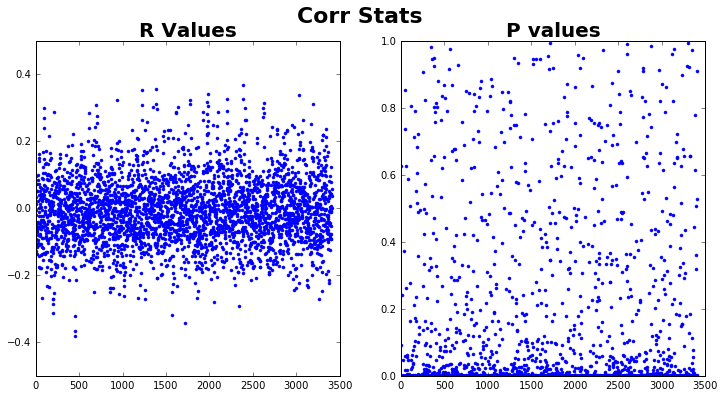

In [24]:
# Plot distribution of R and p-values
pl_dat = 'Terms'
pl_meg = 'Beta'
plot_corrs(om_maps.corrs[pl_dat][pl_meg], om_maps.p_vals[pl_dat][pl_meg])

In [8]:
# Save calculated osc correlations to file
for osc in om_maps.bands:
    om_maps.save_corrs('Terms', osc, save_as_npz=True, save_as_csv=True)

In [14]:
# Calculate correlations with slopes
om_maps.calc_corrs('Terms', 'Slopes', method='parallel')

Calculating corrs between Terms and Slopes
importing numpy on engine(s)
importing pearsonr from scipy.stats.stats on engine(s)


In [25]:
# Check the correlations between term values and slope values
om_maps.check_corrs('Terms', 'Slopes')

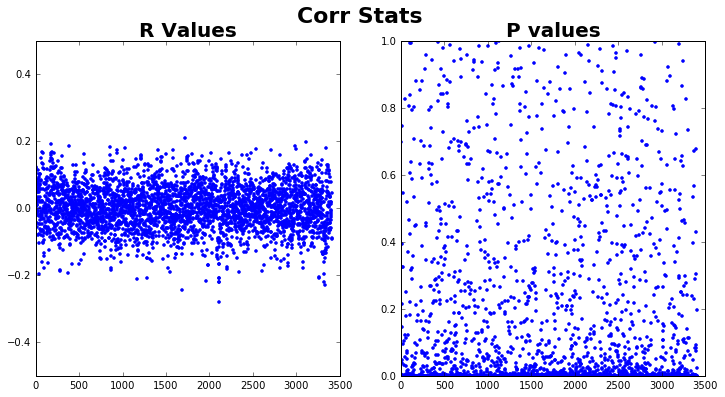

In [17]:
# Plot correlation R- and p-vals between terms & slopes
pl_dat = 'Terms'
pl_meg = 'Slopes'
plot_corrs(om_maps.corrs[pl_dat][pl_meg], om_maps.p_vals[pl_dat][pl_meg])

In [13]:
# Save out correlations between terms and slopes
om_maps.save_corrs('Terms', 'Slopes')